In [28]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pathlib import Path


In [29]:
SR = 44100 #Samplerate
DATA_DIR = Path("data/Datasets 1- Data acquisition using the stethoscope")

In [23]:
data 
c11 = loadmat(DATA_DIR+"/Case 1 - Inner race fault/First speed - 648 rpm.mat")
c12 = loadmat(DATA_DIR+"/Case 1 - Inner race fault/Second speed - 1236rpm.mat")
c13 = loadmat(DATA_DIR+"/Case 1 - Inner race fault/Third speed - 1812rpm.mat")

c21 = loadmat(DATA_DIR+"/Case 2 - Outer race fault/First speed - 642 rpm.mat")
c22 = loadmat(DATA_DIR+"/Case 2 - Outer race fault/Second speed - 1236 rpm.mat")
c23 = loadmat(DATA_DIR+"/Case 2 - Outer race fault/Third speed - 1809 rpm.mat")

c31 = loadmat(DATA_DIR+"/Case 3 - Ball fault/First speed - 636 rpm.mat")
c32 = loadmat(DATA_DIR+"/Case 3 - Ball fault/Second speed - 1230 rpm.mat")
c33 = loadmat(DATA_DIR+"/Case 3 - Ball fault/Third speed - 1812 rpm.mat")

c41 = loadmat(DATA_DIR+"/Case 4 - Healthy bearing/First speed - 636 rpm.mat")
c42 = loadmat(DATA_DIR+"/Case 4 - Healthy bearing/Second speed - 1230 rpm.mat")
c43 = loadmat(DATA_DIR+"/Case 4 - Healthy bearing/Third speed - 1812 rpm.mat")

c51 = loadmat(DATA_DIR+"/Case 5 - Looseness fault/6-Looseness-600rpm.mat")
c52 = loadmat(DATA_DIR+"/Case 5 - Looseness fault/6-Looseness-1200rpm.mat")
c53 = loadmat(DATA_DIR+"/Case 5 - Looseness fault/6-Looseness-1800rpm.mat")

c61 = loadmat(DATA_DIR+"/Case 6 - Combined faults (Inner, outer, ball)/6-Combined-600rpm.mat")
c62 = loadmat(DATA_DIR+"/Case 6 - Combined faults (Inner, outer, ball)/6-Combined-1200rpm.mat")
c63 = loadmat(DATA_DIR+"/Case 6 - Combined faults (Inner, outer, ball)/6-Combined-1800rpm.mat")

print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'x'])


In [25]:
def segment_signal(signal, sr, segment_duration=1.0):
    segment_length = int(segment_duration * sr)
    n_segments = len(signal)/segment_length
    signal = signal[:n_segments*segment_length]
    segments = signal.reshape(n_segments, segment_length)
    return segments

In [17]:
# Finde die eigentliche Signalvariable (nicht __header__ etc.)
signal = np.squeeze(data["x"])

print(signal.shape)

(882001,)


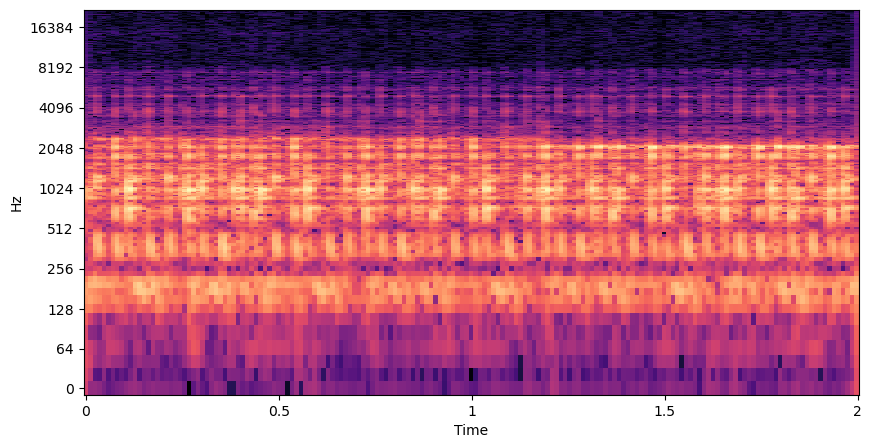

In [18]:
signal_short = signal[:2 * SR]
S = np.abs(librosa.stft(signal_short, n_fft=2048, hop_length=512))
S_db = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(S_db, sr=SR, x_axis="time", y_axis="log")
plt.show()